In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib as plt

### 1. 데이터 불러오기

In [2]:
df = pd.read_csv('data/customer_data.csv', sep='\t')

### 2. 데이터 탐색 및 전처리

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,5,6,5,0,0,0,0,0,0,11


In [4]:
# 데이터 정보 확인
df.info()  # annual_income에 결측값 존재.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   signup_ym              2240 non-null   object 
 2   birth_year             2240 non-null   int64  
 3   annual_income          2216 non-null   float64
 4   marital_status         2240 non-null   object 
 5   children               2240 non-null   int64  
 6   recency                2240 non-null   int64  
 7   amount_alcohol         2240 non-null   int64  
 8   amount_fruit           2240 non-null   int64  
 9   amount_meat            2240 non-null   int64  
 10  amount_fish            2240 non-null   int64  
 11  amount_snack           2240 non-null   int64  
 12  amount_general         2240 non-null   int64  
 13  num_purchase_web       2240 non-null   int64  
 14  num_purchase_store     2240 non-null   int64  
 15  num_

In [5]:
# 결측값 있는 row 제거
df = df.dropna(axis=0)
df

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,5,6,5,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2021-09,1975,79589900.0,배우자 있음,1,46,921700,55900,236600,54600,153400,321100,9,4,2,0,0,0,0,0,0,11
2236,4001,2022-09,1954,83218200.0,배우자 있음,3,56,527800,0,39000,0,0,10400,8,5,7,1,0,0,0,0,0,11
2237,7270,2022-04,1989,74075300.0,이혼,0,91,1180400,62400,282100,41600,15600,31200,2,13,1,0,0,0,1,0,0,11
2238,8235,2022-04,1964,90018500.0,배우자 있음,1,8,556400,39000,278200,104000,39000,79300,6,10,2,0,0,0,0,0,0,11


In [6]:
# marital status의 데이터 종류 파악하기
df['marital_status'].unique()

array(['미혼', '배우자 있음', '이혼', '사별'], dtype=object)

In [7]:
# recency 이름 변경
df.rename(columns={'recency':'Recency'}, inplace=True)

In [8]:
# 총 구매금액
df['Monetary'] = df.loc[:, 'amount_alcohol':'amount_general'].sum(axis='columns')
# 총 구매횟수
df['Frequency'] = df.loc[:, 'num_purchase_web':'num_purchase_discount'].sum(axis='columns')

df.head()

,ID,signup_ym,birth_year,annual_income,marital_status,children,Recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,Monetary,Frequency
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11,2102100,15
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,11,35100,5
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,11,1008800,19
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,2,4,2,0,0,0,0,0,0,11,68900,8
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,5,6,5,0,0,0,0,0,0,11,548600,16


In [9]:
# birth_year을 age로 변경
age = 2023 - df['birth_year']
df['birth_year'] = age

In [10]:
# birth_year 열 이름 변경
df.rename(columns={'birth_year':'age'}, inplace=True)
df.head()

,ID,signup_ym,age,annual_income,marital_status,children,Recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,Monetary,Frequency
0,5524,2020-12,58,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11,2102100,15
1,2174,2022-06,61,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,11,35100,5
2,4141,2021-11,50,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,11,1008800,19
3,6182,2022-05,31,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,2,4,2,0,0,0,0,0,0,11,68900,8
4,5324,2022-04,34,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,5,6,5,0,0,0,0,0,0,11,548600,16


In [11]:
# 정제된 데이터로 통계정보 보기
df.describe()

,ID,age,annual_income,children,Recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,Monetary,Frequency
count,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2.216000e+03,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2.216000e+03,2216.000000
mean,5588.353339,46.179603,6.792143e+07,0.947202,49.012635,3.966191e+05,34262.861011,2.170947e+05,48928.925993,35137.545126,57154.828520,4.085289,5.800993,2.323556,0.064079,0.013538,0.073556,0.074007,0.073105,0.150271,11.0,7.891980e+05,12.209838
std,3249.376275,11.985554,3.272500e+07,0.749062,28.948352,4.385263e+05,51732.091474,2.915683e+05,71177.707139,53393.659367,67360.038687,2.740951,3.250785,1.923716,0.244950,0.115588,0.261106,0.261842,0.260367,0.357417,0.0,7.837706e+05,5.861202
min,0.000000,19.000000,2.249000e+06,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0,6.500000e+03,0.000000
25%,2814.750000,38.000000,4.589390e+07,0.000000,24.000000,3.120000e+04,2600.000000,2.080000e+04,3900.000000,1300.000000,11700.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0,8.970000e+04,7.000000
50%,5458.500000,45.000000,6.679595e+07,1.000000,49.000000,2.268500e+05,10400.000000,8.840000e+04,15600.000000,10400.000000,31850.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0,5.154500e+05,12.000000
75%,8421.750000,56.000000,8.907860e+07,1.000000,74.000000,6.565000e+05,42900.000000,3.019250e+05,65000.000000,42900.000000,72800.000000,6.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0,1.362400e+06,17.000000
max,11191.000000,122.000000,8.666658e+08,3.000000,99.000000,1.940900e+06,258700.000000,2.242500e+06,336700.000000,340600.000000,417300.000000,27.000000,13.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.0,3.282500e+06,33.000000


### 3. 데이터 분석

In [12]:
# 폰트 설정
plt.rc('font', family='NanumGothic')

#### 1) 고객 연령대

<Axes: xlabel='age', ylabel='Count'>

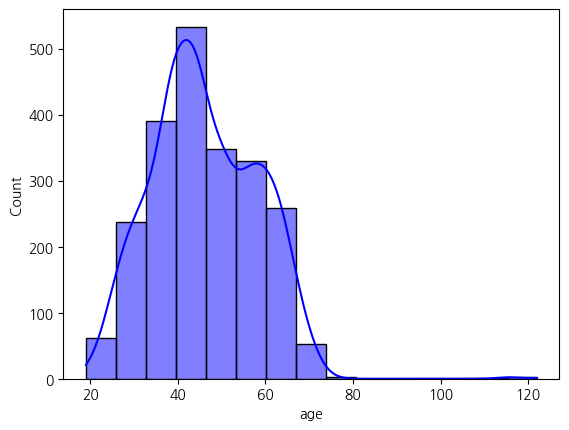

In [13]:
# 고객 연령대 분포 확인하기 - 히스토그램
sns.histplot(data=df, x='age', color='b', kde=True, bins=15)

- 30~60세 사이의 고객이 많음. 그 중 40대 고객이 최다.
- 120세라는 이상치 존재.

In [14]:
# 나이 이상치 제거
df = df[df['age'] <= 100]

<Axes: xlabel='age', ylabel='Count'>

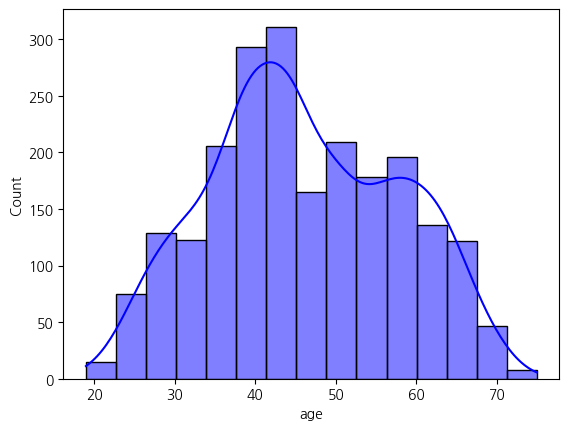

In [15]:
# 이상치 제거 후 분포 확인
sns.histplot(data=df, x='age', 
             color='b', 
             kde=True, 
             bins=15)

In [16]:
# 연령대 설정하기
age_bins = list(range(10, 81, 10))  # 10살 단위로 연령대 설정
print(age_bins)

# 각 연령대 이름 설정하기
age_labels = [f'{i}대' for i in age_bins[:-1]]  # 80대는 제외
print(age_labels)

# 연령대 구간 나누기
age_group = pd.cut(x=df['age'],  # 나누려는 데이터
                   bins=age_bins,  # (10, 20], (20, 30]...
                   labels=age_labels,  # 구간 이름
                   right=False)

[10, 20, 30, 40, 50, 60, 70, 80]
['10대', '20대', '30대', '40대', '50대', '60대', '70대']


In [17]:
# 연령대 컬럼 추가하기
df.insert(
    loc=df.columns.get_loc('age') + 1,  # 삽입될 열 위치
    column='age_group',  # 삽입될 열 이름
    value=age_group,  # 삽입될 열의 값
)
df.head()

,ID,signup_ym,age,age_group,annual_income,marital_status,children,Recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,Monetary,Frequency
0,5524,2020-12,58,50대,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11,2102100,15
1,2174,2022-06,61,60대,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,11,35100,5
2,4141,2021-11,50,50대,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,11,1008800,19
3,6182,2022-05,31,30대,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,2,4,2,0,0,0,0,0,0,11,68900,8
4,5324,2022-04,34,30대,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,5,6,5,0,0,0,0,0,0,11,548600,16


In [18]:
# 각 연령대의 데이터 개수 확인
df['age_group'].value_counts()

age_group
40대    678
30대    502
50대    485
60대    338
20대    185
70대     23
10대      2
Name: count, dtype: int64

- 70대와 10대의 수가 매우 적음.
- 10대는 20대와 합쳐서 '20대 이하'로 변경,
- 70대는 60대와 합쳐서 '60대 이상'로 변경

In [19]:
replace_dict = {
    '10대': '20대 이하',
    '20대': '20대 이하',
    '60대': '60대 이상',
    '70대': '60대 이상'
}
df.loc[:, 'age_group'] = df['age_group'].replace(replace_dict)

In [20]:
df['age_group'].value_counts()

age_group
40대       678
30대       502
50대       485
60대 이상    361
20대 이하    187
Name: count, dtype: int64

#### 2) 고객 소득

<Axes: >

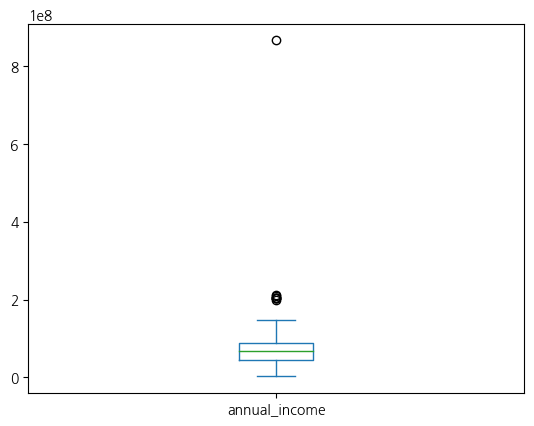

In [21]:
# 고객 소득 수준 분포 파악 - boxplot
df.plot(kind='box', y='annual_income')

- y축 단위: 억
- 이상치 존재 -> 제거

In [22]:
# IQR을 기준으로 이상치 제거하기
income = df['annual_income']
q1 = income.quantile(0.25)  # Q1: 25% 구간
q3 = income.quantile(0.75)  # Q3: 75% 구간
iqr = q3 - q1
minimum = q1 - 1.5 * iqr
maximum = q3 + 1.5 * iqr

normal = (income >= minimum) & (income <= maximum)
df = df[normal]

<Axes: >

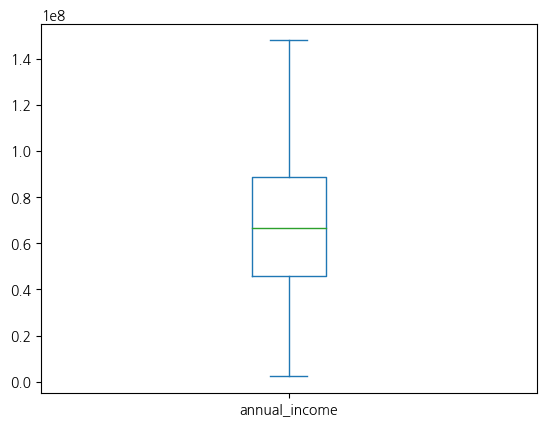

In [23]:
# 이상치 제거 확인
df.plot(kind='box', y='annual_income')

### 3-1. RFM - 고객 세그먼트 분류

- 3개의 세그먼트

In [24]:
# 세그먼트 개수 설정
segment_num = 3

In [25]:
# 등급 레이블 설정
grade_labels = list(range(1, segment_num + 1))
grade_labels

[1, 2, 3]

##### Recency

In [26]:
# 데이터 등분
recency_grade = pd.qcut(x = df['Recency'],  # 나눌 데이터
                        q = segment_num,  # 등분할 개수
                       labels = grade_labels[::-1])
# recency 값이 작은 순서대로 3-2-1등급

In [27]:
# recency_grade 컬럼 추가
df['recency_grade'] = recency_grade

# 등급별 데이터 개수 확인
df['recency_grade'].value_counts()

/tmp/ipykernel_97/3546935231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recency_grade'] = recency_grade


recency_grade
3    752
1    730
2    723
Name: count, dtype: int64

- 각 등급에 거의 비슷한 양의 데이터가 배정됨.

In [28]:
# 등급에 따른 매출 기여도
groupby_recency = df.groupby('recency_grade').sum(numeric_only=True).reset_index()
groupby_recency

,recency_grade,ID,age,annual_income,children,Recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,Monetary,Frequency
0,3,4338743,34326,5.059218e+10,678,11988,293945600,26728000,157576900,37583000,25539800,42485300,3103,4386,1693,54,12,67,55,60,179,8272,583858600,9182
1,2,4001190,33737,4.818995e+10,724,35840,294073000,23675600,151742500,35046700,25147200,41268500,2992,4240,1771,47,8,47,52,48,95,7953,570953500,9003
2,1,3975961,33578,4.919261e+10,690,60237,289602300,25281100,164547500,35599200,27076400,42536000,2947,4215,1648,41,10,49,57,53,59,8030,584642500,8810


<Axes: title={'center': 'Recency 등급별 매출 기여도'}>

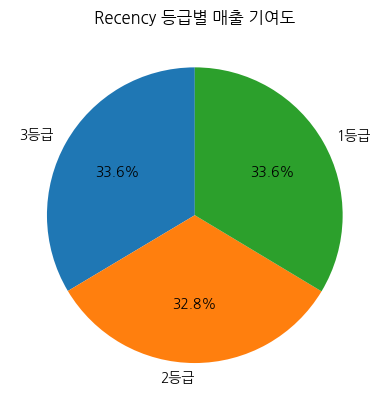

In [29]:
# 매출 기여도 시각화
groupby_recency['Monetary'].plot(
    kind='pie',
    autopct='%.1f%%',  # 그래프 내 숫자 표시 형식, 소수점 한 자리
    labels=[f'{x}등급' for x in grade_labels[::-1]],
    title='Recency 등급별 매출 기여도',
    startangle=90,  # 시작점 각도
    ylabel=''
)

- 각 등급에 따른 매출 차이가 크지 않음.
- recency는 매출에 크게 기여하지 않음을 알 수 있다.

##### Frequency

In [30]:
# 데이터 등분
freq_grade = pd.qcut(x = df['Frequency'],
                        q = segment_num,
                       labels = grade_labels)
# frequency 값이 큰 순서대로 3-2-1등급

In [31]:
# recency_grade 컬럼 추가
df['frequency_grade'] = freq_grade

# 등급별 데이터 개수 확인
df['frequency_grade'].value_counts()

/tmp/ipykernel_97/956849519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['frequency_grade'] = freq_grade


frequency_grade
1    851
2    679
3    675
Name: count, dtype: int64

- 1등급(가장 낮은 등급)의 수가 가장 많다.

In [32]:
# 등급에 따른 매출 기여도
groupby_freq = df.groupby('frequency_grade').sum(numeric_only=True).reset_index()
groupby_freq

,frequency_grade,ID,age,annual_income,children,Recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,Monetary,Frequency
0,1,4805816,36992,3.888393e+10,989,41579,55630900,7387900,38834900,10792600,7022600,17867200,1477,2560,1365,7,3,61,8,7,80,9361,137536100,5402
1,2,3834860,31947,5.268116e+10,496,33525,342971200,32916000,220378600,47747700,33254000,50017500,2940,4021,1522,69,14,54,69,87,130,7469,727285000,8483
2,3,3675218,32702,5.640964e+10,607,32961,479018800,35380800,214653400,49688600,37486800,58405100,4625,6260,2225,66,13,48,87,67,123,7425,874633500,13110


<Axes: title={'center': 'Frequency 등급별 매출 기여도'}>

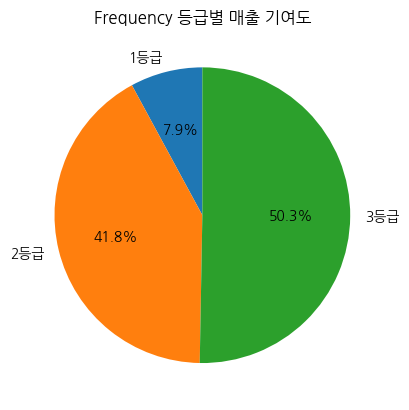

In [33]:
# 매출 기여도 시각화
groupby_freq['Monetary'].plot(
    kind='pie',
    autopct='%.1f%%',  # 그래프 내 숫자 표시 형식, 소수점 한 자리
    labels=[f'{x}등급' for x in grade_labels],
    title='Frequency 등급별 매출 기여도',
    startangle=90,  # 시작점 각도
    ylabel=''
)

- 1등급에 해당하는 고객 수가 가장 많음에도 불구하고, 매출이 가장 낮음.
- 등급이 낮아질수록 매출 기여도가 눈에 띄게 줄어든다는 점에서 frequency는 매출에 큰 영향을 주는 요소.

##### Monetary

In [34]:
# 데이터 등분
money_grade = pd.qcut(x = df['Monetary'],
                        q = segment_num,
                       labels = grade_labels)
# monetary 값이 큰 순서대로 3-2-1등급

In [35]:
# recency_grade 컬럼 추가
df['monetary_grade'] = money_grade

# 등급별 데이터 개수 확인
df['monetary_grade'].value_counts()

/tmp/ipykernel_97/3076819191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['monetary_grade'] = money_grade


monetary_grade
1    735
2    735
3    735
Name: count, dtype: int64

In [36]:
# 등급에 따른 매출 기여도
groupby_money = df.groupby('monetary_grade').sum(numeric_only=True).reset_index()
groupby_money

,monetary_grade,ID,age,annual_income,children,Recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,Monetary,Frequency
0,1,4201790,31486,2.984158e+10,944,35704,17254900,3122600,11546600,4572100,3257800,9497800,1170,2091,1307,0,2,56,3,0,57,8085,49251800,4568
1,2,4007808,34920,4.868252e+10,814,35495,212998500,16786900,84479200,23622300,16887000,42303300,3683,4407,2365,15,4,42,56,8,91,8085,397077200,10455
2,3,4106296,35235,6.945063e+10,334,36866,647367500,55775200,377841100,80034500,57618600,74488700,4189,6343,1440,127,24,65,105,153,185,8085,1293125600,11972


<Axes: title={'center': 'Monetary 등급별 매출 기여도'}>

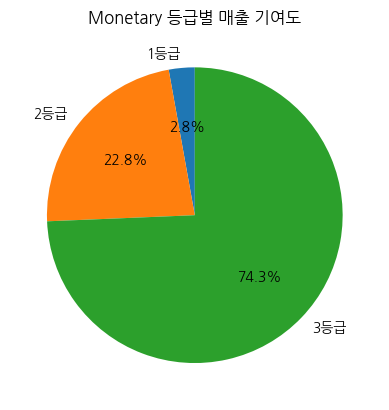

In [37]:
# 매출 기여도 시각화
groupby_money['Monetary'].plot(
    kind='pie',
    autopct='%.1f%%',  # 그래프 내 숫자 표시 형식, 소수점 한 자리
    labels=[f'{x}등급' for x in grade_labels],
    title='Monetary 등급별 매출 기여도',
    startangle=90,  # 시작점 각도
    ylabel=''
)

- 총 구매 금액이 가장 큰 3등급의 매출 기여도가 가장 높고, 등급이 낮아질수록 매출 기여도가 큰 폭으로 떨어짐.
- 1등급 고객의 수가 3등급과 동일함에도 불구하고 매출에 있어서 매우 큰 차이가 있음.
- 구매 금액이 큰 고객을 위주로 마케팅을 하는 것이 매출에 유리해보임.